In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("/Users/auratorresmedina/Library/CloudStorage/GoogleDrive-torresmedinaaura@gmail.com/Mi unidad/Capstone/Datos/datos_arreglados.csv",index_col=0, sep=',')

In [10]:
df.head()

,date,item,category,department,stores,region,week,year,is_holidays,units_sold,sell_price,total_sales
0,2013-07-08,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,0,0,12.7414,0.0000
1,2013-07-15,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,28,2013,1,0,12.7414,0.0000
2,2013-07-22,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,29,2013,0,4,10.9858,43.9432
3,2013-07-29,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,30,2013,0,6,10.9858,65.9148
4,2013-08-05,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End(BOS_1),Boston,31,2013,0,0,10.9858,0.0000


In [3]:
df.columns


Index(['date', 'item', 'category', 'department', 'stores', 'region', 'week',
       'year', 'is_holidays', 'units_sold', 'sell_price', 'total_sales'],
      dtype='object')

In [5]:
df.dtypes


date            object
item            object
category        object
department      object
stores          object
region          object
week             int64
year             int64
is_holidays      int64
units_sold       int64
sell_price     float64
total_sales    float64
dtype: object

In [6]:
df.describe()

,week,year,is_holidays,units_sold,sell_price,total_sales
count,6.610513e+06,6.610513e+06,6.610513e+06,6.610513e+06,6.610513e+06,6.610513e+06
mean,2.582837e+01,2.013544e+03,2.535613e-01,9.883915e+00,5.515011e+00,3.473386e+01
std,1.523091e+01,1.474738e+00,4.350494e-01,2.618403e+01,4.382849e+00,7.664774e+01
min,1.000000e+00,2.011000e+03,0.000000e+00,0.000000e+00,1.200000e-02,0.000000e+00
25%,1.200000e+01,2.012000e+03,0.000000e+00,1.000000e+00,2.620100e+00,1.176000e+00
50%,2.500000e+01,2.014000e+03,0.000000e+00,3.000000e+00,4.200000e+00,1.492500e+01
75%,3.900000e+01,2.015000e+03,1.000000e+00,1.000000e+01,7.176000e+00,3.854340e+01
max,5.200000e+01,2.016000e+03,1.000000e+00,4.220000e+03,1.341500e+02,7.549160e+03


In [7]:
df.isnull().sum()


date           0
item           0
category       0
department     0
stores         0
region         0
week           0
year           0
is_holidays    0
units_sold     0
sell_price     0
total_sales    0
dtype: int64

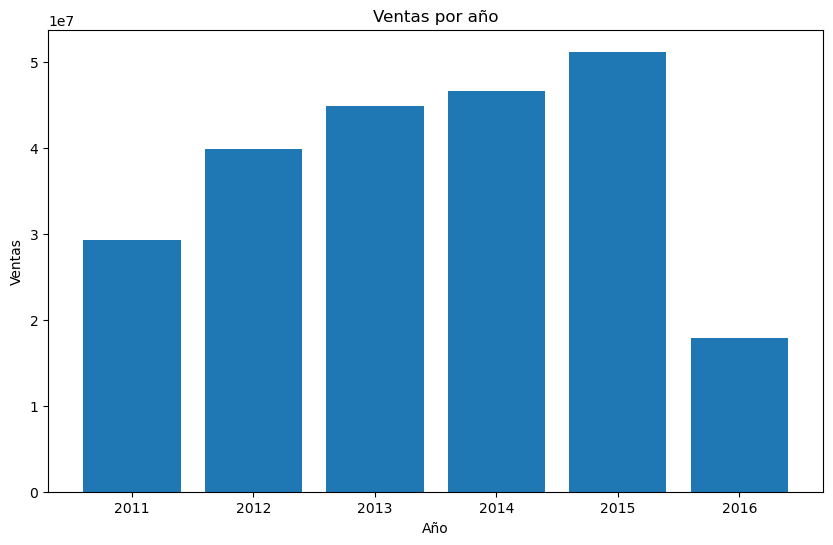

In [11]:
year_sales= df.groupby('year')['total_sales'].sum()
plt.figure(figsize=(10,6))
plt.bar(year_sales.index, year_sales.values)
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Ventas por año')
plt.show()

In [27]:
for year in years:
    df_year = df[df.index.year == year]
    sales_per_year = df_year['total_sales'].sum()
    print(f'Ventas en {year}: {sales_per_year}')

Ventas en 2013: 44091499.958299994
Ventas en 2014: 46429053.42759997
Ventas en 2015: 51994110.4217
Ventas en 2016: 17919419.132999998
Ventas en 2011: 28671346.412899997
Ventas en 2012: 40503219.58110001


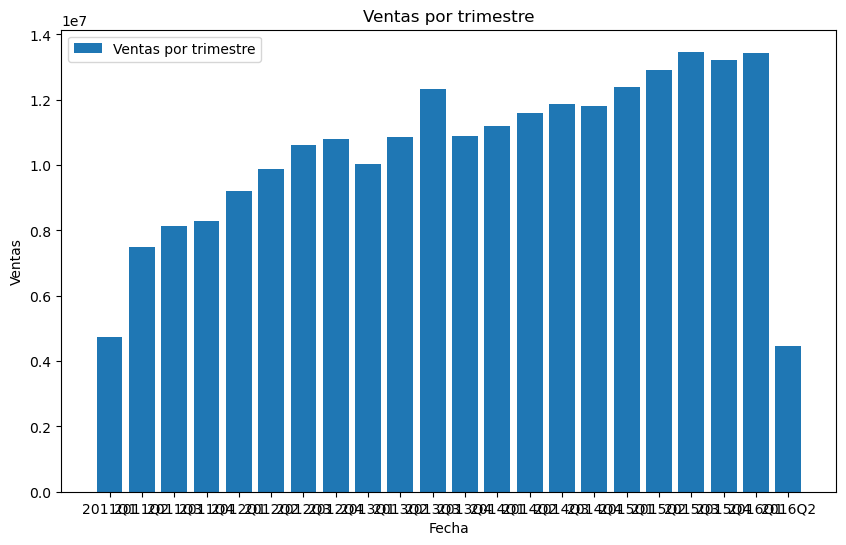

In [30]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

quarter_sales = df.resample('Q')['total_sales'].sum()
quarter_sales.index = quarter_sales.index.to_period('Q')

plt.figure(figsize=(10,6))
plt.bar(quarter_sales.index.astype(str), quarter_sales.values, label='Ventas por trimestre')

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas por trimestre')
plt.legend()
plt.show()

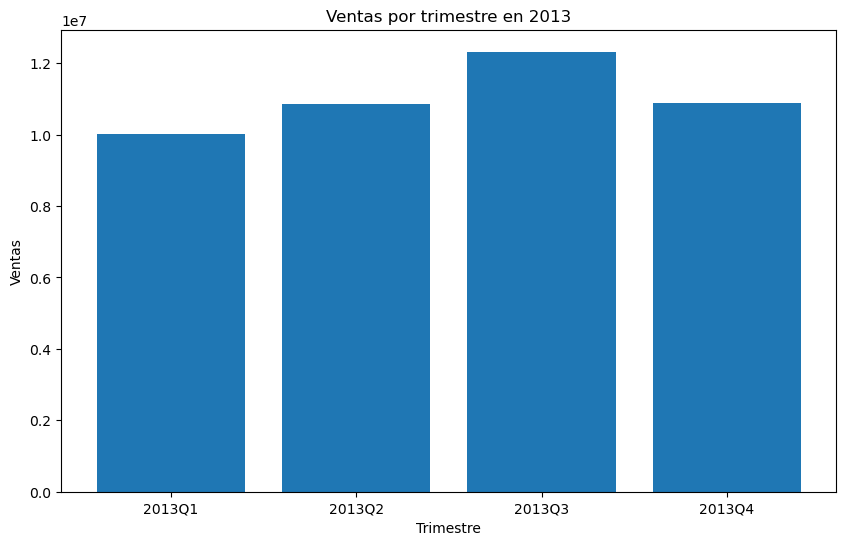

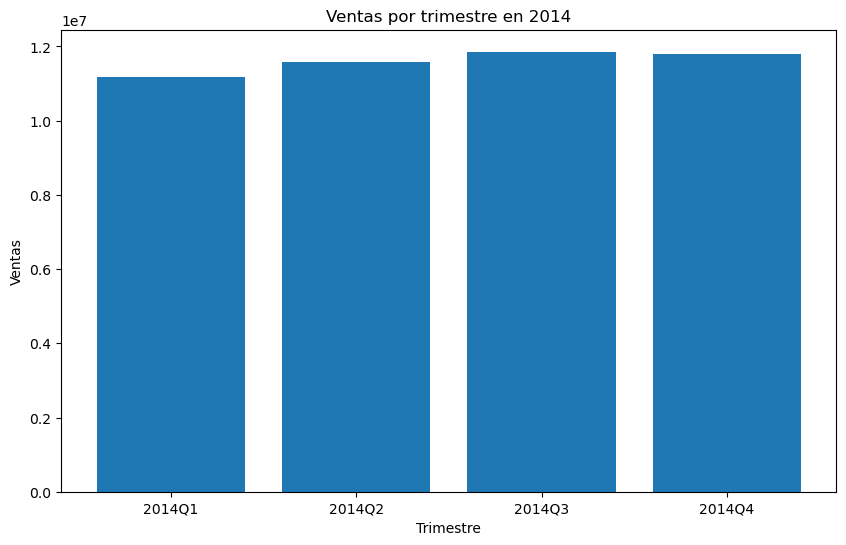

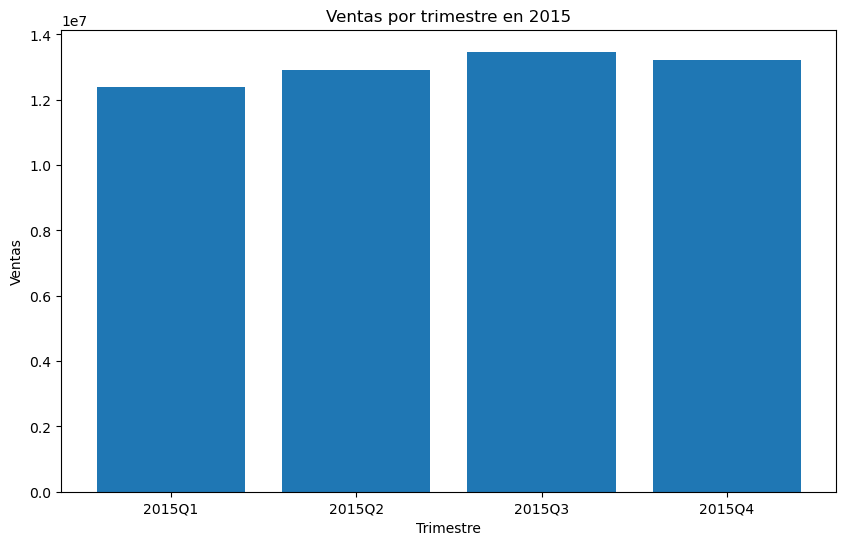

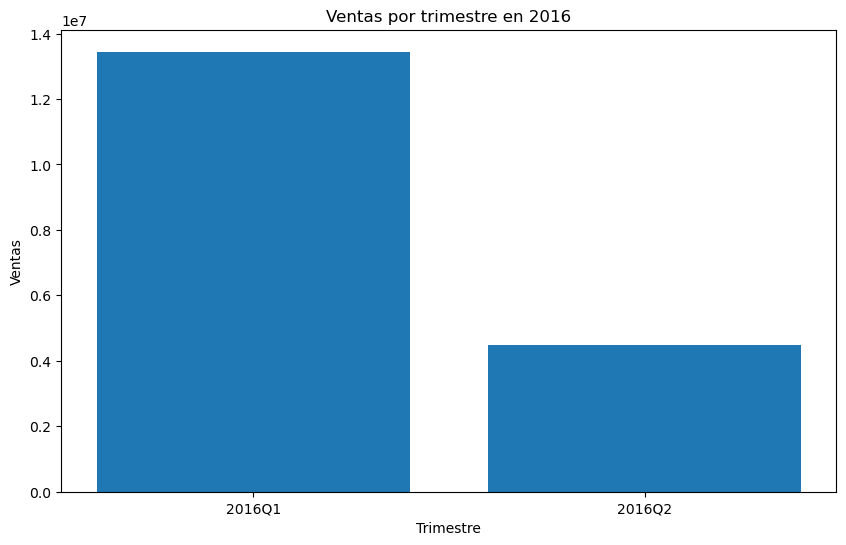

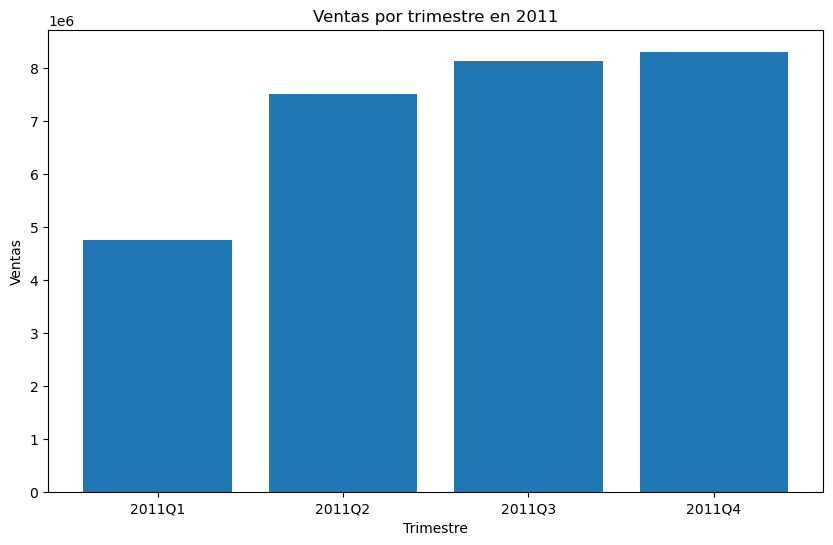

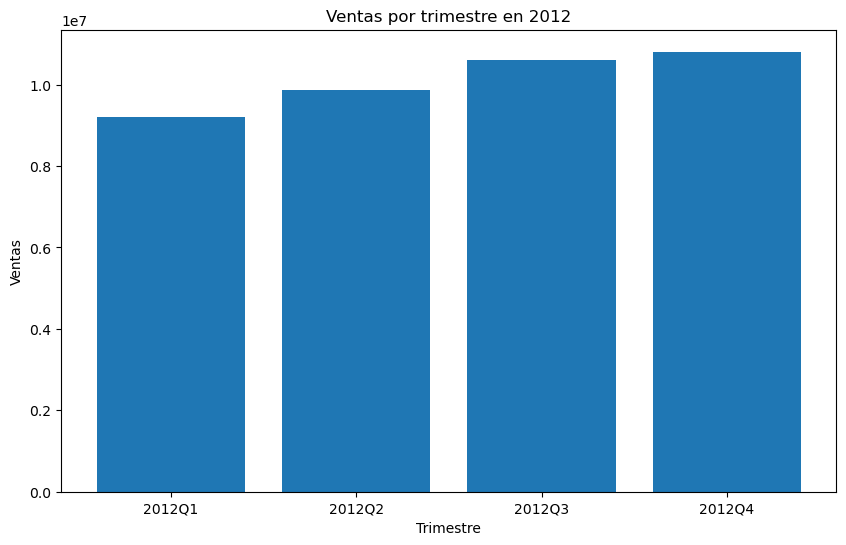

In [19]:
years = df.index.year.unique()

for year in years:
    df_year = df[df.index.year == year]
    sales_per_quarter = df_year.resample('Q')['total_sales'].sum()

    sales_per_quarter.index = sales_per_quarter.index.to_period('Q')

    plt.figure(figsize=(10,6))
    plt.bar(sales_per_quarter.index.astype(str), sales_per_quarter.values)
    plt.xlabel('Trimestre')
    plt.ylabel('Ventas')
    plt.title(f'Ventas por trimestre en {year}')
    plt.show()

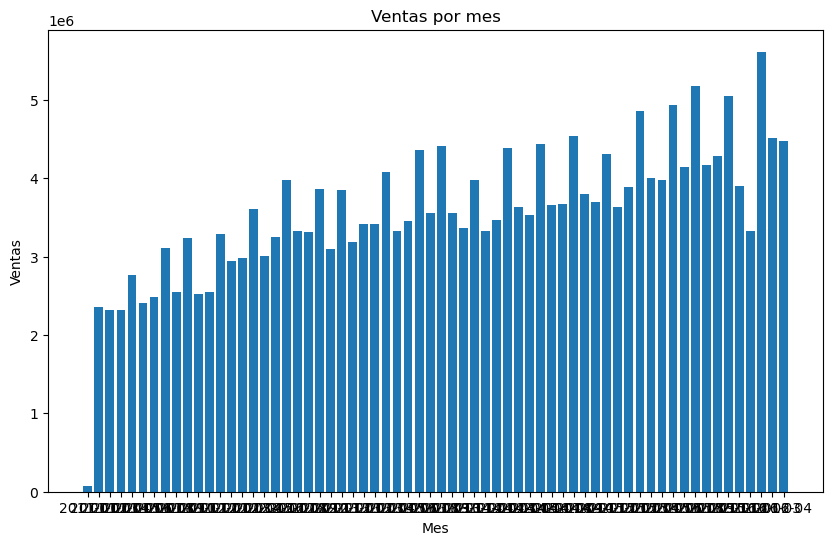

In [24]:
sales_per_month = df.resample('M')['total_sales'].sum()
sales_per_month.index = sales_per_month.index.to_period('M')

plt.figure(figsize=(10,6))
plt.bar(sales_per_month.index.astype(str), sales_per_month.values)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas por mes')
plt.show()

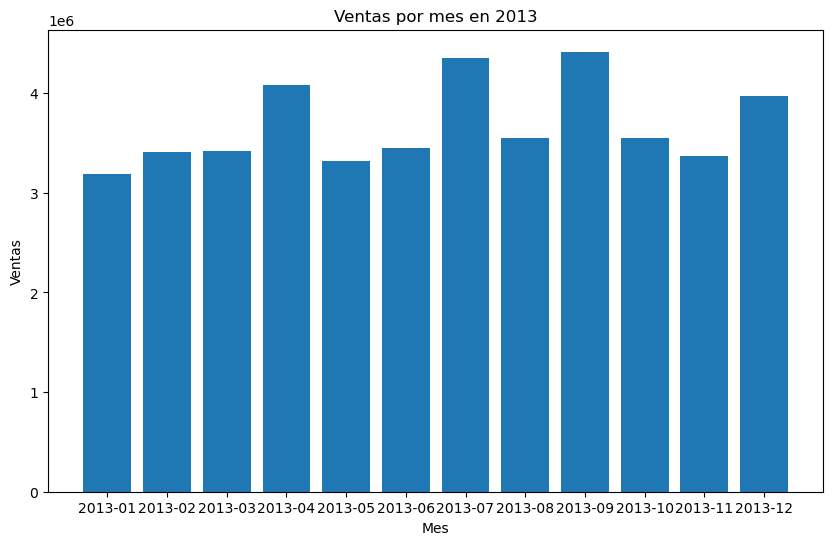

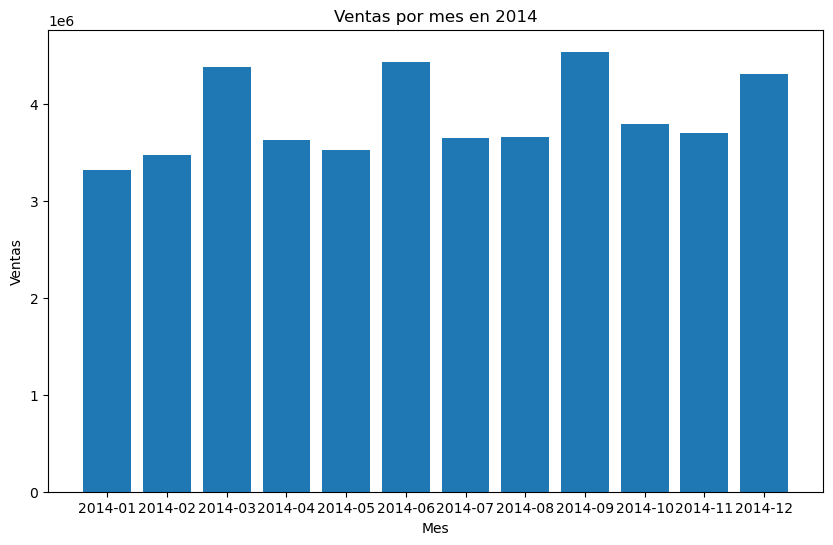

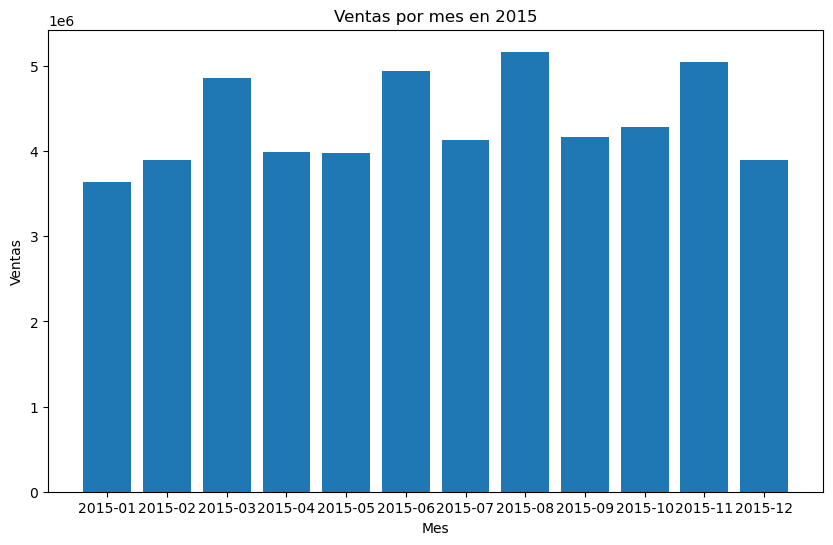

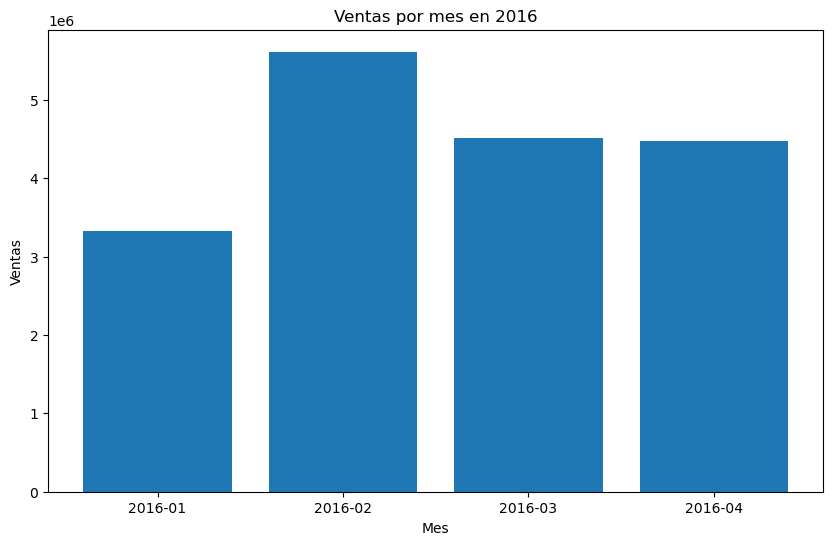

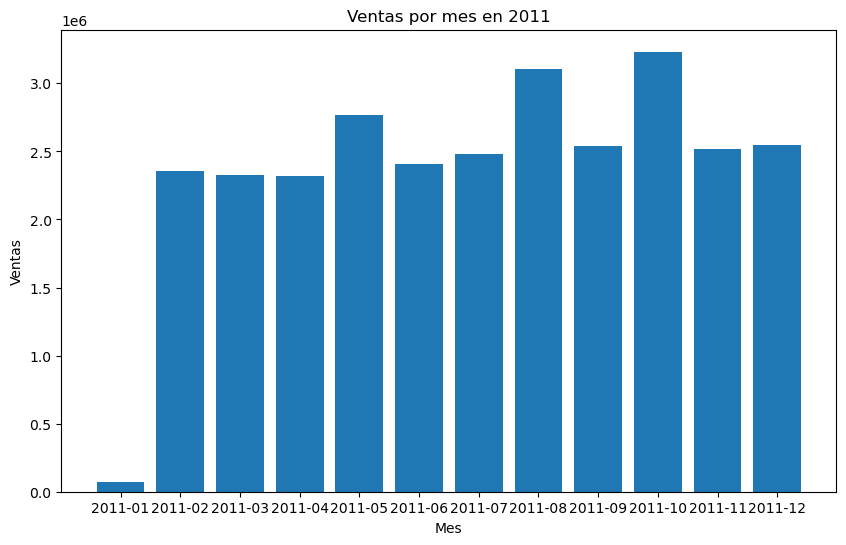

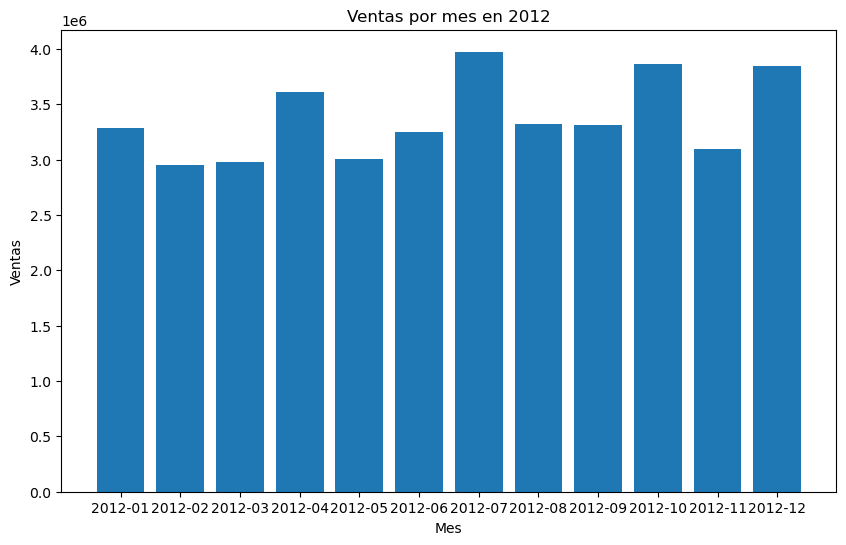

In [31]:
def plot_sales_per_month(df):
    
    years = df.index.year.unique()

    for year in years:
        df_year = df[df.index.year == year]
        
        # Ventas por mes
        sales_per_month = df_year.resample('M')['total_sales'].sum()
        sales_per_month.index = sales_per_month.index.to_period('M')

        plt.figure(figsize=(10,6))
        plt.bar(sales_per_month.index.astype(str), sales_per_month.values)
        plt.xlabel('Mes')
        plt.ylabel('Ventas')
        plt.title(f'Ventas por mes en {year}')
        plt.show()

# Llamar a la función
plot_sales_per_month(df)

In [33]:
def print_sales_per_month(df):
    years = df.index.year.unique()

    for year in years:
        df_year = df[df.index.year == year]
        
        sales_per_month = df_year.resample('M')['total_sales'].sum()
        sales_per_month.index = sales_per_month.index.to_period('M')

        print(f'Ventas por mes en {year}:')
        print(sales_per_month)
        print('\n')

print_sales_per_month(df)

Ventas por mes en 2013:
date
2013-01    3.191259e+06
2013-02    3.409646e+06
2013-03    3.419614e+06
2013-04    4.081596e+06
2013-05    3.321995e+06
2013-06    3.452182e+06
2013-07    4.354427e+06
2013-08    3.550929e+06
2013-09    4.414944e+06
2013-10    3.552780e+06
2013-11    3.369515e+06
2013-12    3.972612e+06
Freq: M, Name: total_sales, dtype: float64


Ventas por mes en 2014:
date
2014-01    3.324385e+06
2014-02    3.470546e+06
2014-03    4.388490e+06
2014-04    3.630521e+06
2014-05    3.525258e+06
2014-06    4.433580e+06
2014-07    3.651670e+06
2014-08    3.665015e+06
2014-09    4.541543e+06
2014-10    3.791086e+06
2014-11    3.698075e+06
2014-12    4.308884e+06
Freq: M, Name: total_sales, dtype: float64


Ventas por mes en 2015:
date
2015-01    3.636608e+06
2015-02    3.891705e+06
2015-03    4.862174e+06
2015-04    3.995575e+06
2015-05    3.978303e+06
2015-06    4.937044e+06
2015-07    4.135857e+06
2015-08    5.168704e+06
2015-09    4.165549e+06
2015-10    4.279499e+06
2015-11

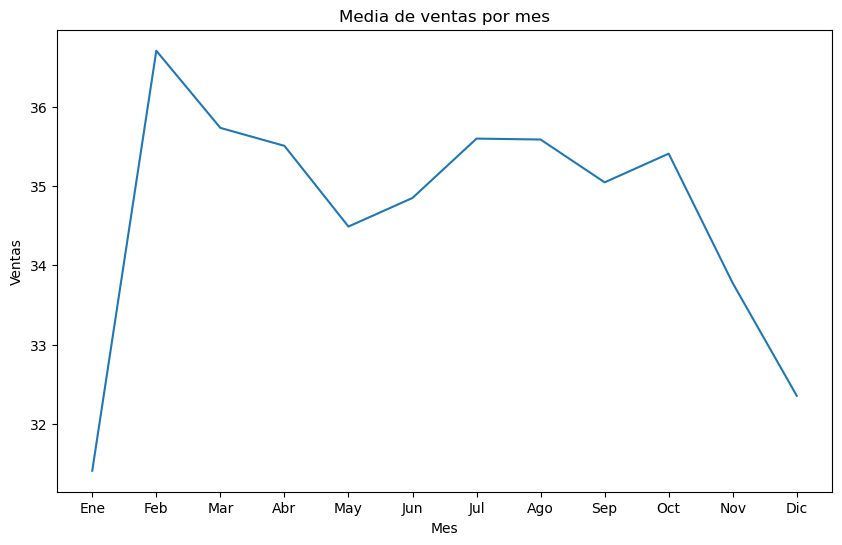

In [35]:
sales_per_month = df.groupby(df.index.month)['total_sales'].mean()

months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.figure(figsize=(10,6))
plt.plot(months, sales_per_month.values)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Media de ventas por mes')
plt.show()

In [36]:

sales_per_month_sum = df.groupby(df.index.month)['total_sales'].sum()
sales_per_month_mean = df.groupby(df.index.month)['total_sales'].mean()
sales_per_month_mode = df.groupby(df.index.month)['total_sales'].apply(lambda x: x.mode()[0])

print("Suma de ventas por mes:")
for month, total in zip(months, sales_per_month_sum):
    print(f"{month}: {total}")

print("\nMedia de ventas por mes:")
for month, mean in zip(months, sales_per_month_mean):
    print(f"{month}: {mean}")

print("\nModa de ventas por mes:")
for month, mode in zip(months, sales_per_month_mode):
    print(f"{month}: {mode}")

Suma de ventas por mes:
Ene: 16830338.7219
Feb: 21687288.6522
Mar: 22484969.941800002
Abr: 22109031.4711
May: 16599900.6201
Jun: 18482715.894700002
Jul: 18593845.5671
Ago: 18815447.6757
Sep: 18980640.05
Oct: 18719887.587700002
Nov: 17726623.3735
Dic: 18577959.3788

Media de ventas por mes:
Ene: 31.408499573390465
Feb: 36.70796954025518
Mar: 35.734387447733326
Abr: 35.50790325736247
May: 34.48950166547892
Jun: 34.85023181935601
Jul: 35.59925248817752
Ago: 35.587463213671015
Sep: 35.047242107712165
Oct: 35.40933319153122
Nov: 33.774839855234006
Dic: 32.353551669142504

Moda de ventas por mes:
Ene: 0.0
Feb: 0.0
Mar: 0.0
Abr: 0.0
May: 0.0
Jun: 0.0
Jul: 0.0
Ago: 0.0
Sep: 0.0
Oct: 0.0
Nov: 0.0
Dic: 0.0


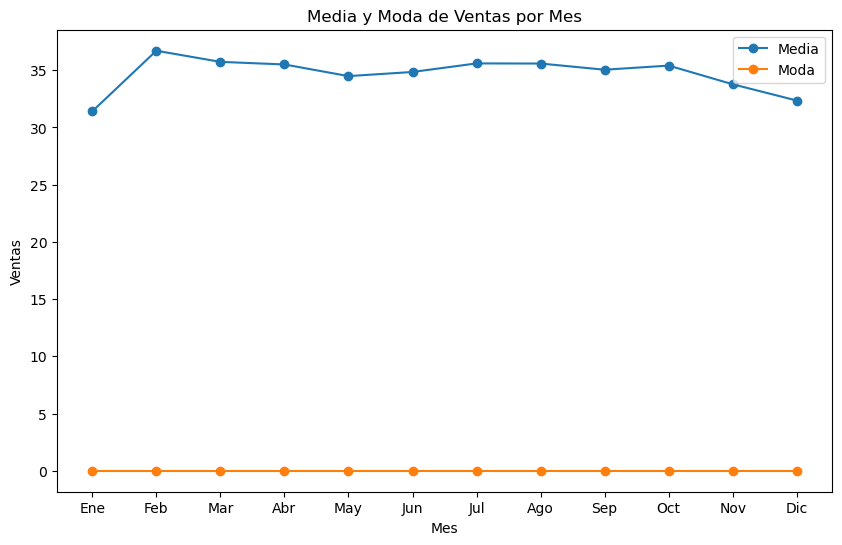

In [40]:
sales_per_month_mean = df.groupby(df.index.month)['total_sales'].mean()
sales_per_month_mode = df.groupby(df.index.month)['total_sales'].apply(lambda x: x.mode()[0])

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_mean, marker='o', label='Media')
plt.plot(months, sales_per_month_mode, marker='o', label='Moda')

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Media y Moda de Ventas por Mes')
plt.legend()
plt.show()

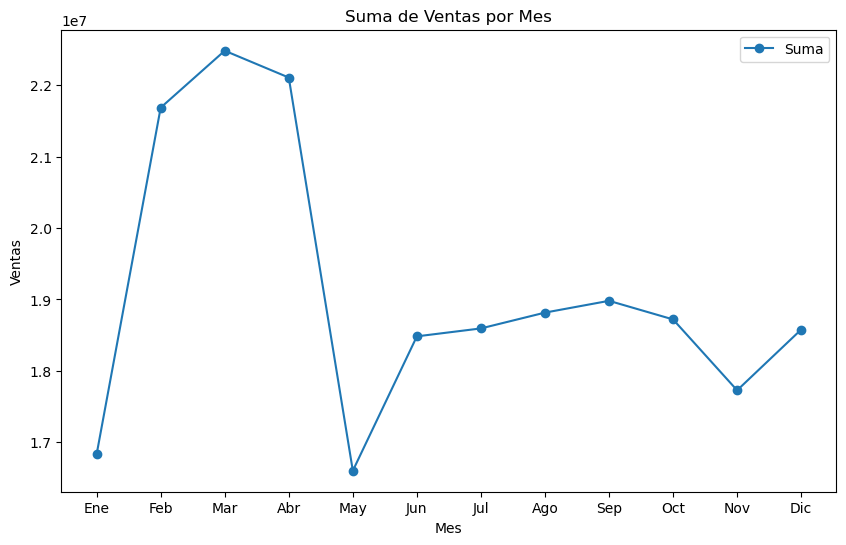

In [41]:
sales_per_month_sum = df.groupby(df.index.month)['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.plot(months, sales_per_month_sum, marker='o', label='Suma')

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Suma de Ventas por Mes')
plt.legend()
plt.show()

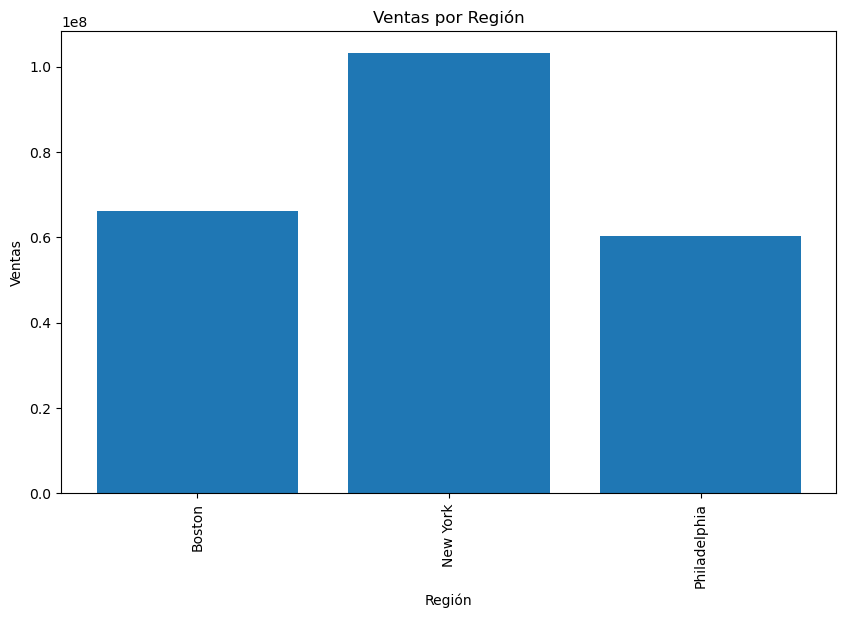

In [42]:
sales_per_region = df.groupby('region')['total_sales'].sum()

plt.figure(figsize=(10,6))

plt.bar(sales_per_region.index, sales_per_region.values)
plt.xlabel('Región')
plt.ylabel('Ventas')
plt.title('Ventas por Región')
plt.xticks(rotation=90)  
plt.show()

/var/folders/0v/hckyh79x76xbj22znr49dsv80000gn/T/ipykernel_3526/2677828585.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


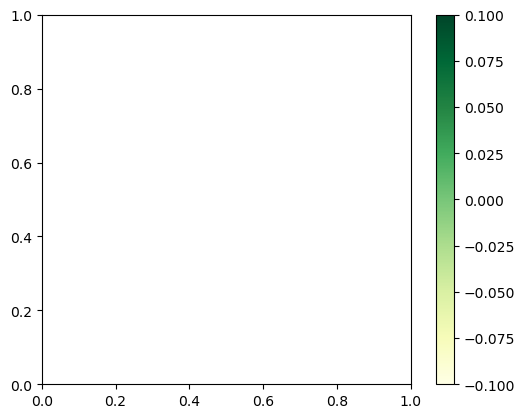

In [47]:
import geopandas as gpd

usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['name'].isin(['Alaska', 'Hawaii']) == False]  # Excluir Alaska y Hawaii

sales_per_state = df.groupby('region')['total_sales'].sum()

usa.set_index('name', inplace=True)
usa['total_sales'] = sales_per_state

fig, ax = plt.subplots(1, 1)
usa.plot(column='total_sales', ax=ax, legend=True, cmap='YlGn')
plt.show()